# **Lab: Unstructured Data**



## Exercise 2: Bee versus Ant

In this exercise, we will apply transfer learning on a pre-trained Resnet model with Pytorch for classifying images of bees and ants. We will be working on the Hymenoptera dataset:
https://download.pytorch.org/tutorial/hymenoptera_data.zip

The steps are:
1.   Setup Repository
2.   Load Dataset
3.   Prepare Data
4.   Define Architecture
5.   Train Model
6.   Push Changes


### 1. Setup Repository

**[1.1]** Go inside the created folder `adv_dsi_lab_6`

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Go inside the created folder adv_dsi_lab_6

In [ ]:
# Solution
cd adv_dsi_lab_6

**[1.2]** Create a new git branch called pytorch_bee_ant

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Create a new git branch called pytorch_bee_ant

In [ ]:
# Solution
git checkout -b pytorch_bee_ant

**[1.3]** Run the built image

In [ ]:
docker run  -dit --rm --name adv_dsi_lab_6 -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes -v ~/Projects/adv_dsi/adv_dsi_lab_6:/home/jovyan/work -v ~/Projects/adv_dsi/src:/home/jovyan/work/src pytorch-notebook:latest 

**[1.4]** Display last 50 lines of logs

In [ ]:
docker logs --tail 50 adv_dsi_lab_6

Copy the url displayed and paste it to a browser in order to launch Jupyter Lab

**[1.6]** Navigate the folder `notebooks` and create a new jupyter notebook called `2_pytorch_ant_bee.ipynb`

### 2.   Load Dataset

**[2.1]** Import `download_and_extract_archive` from `torchvision.datasets.utils`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import download_and_extract_archive from torchvision.datasets.utils

In [1]:
#Solution
from torchvision.datasets.utils import download_and_extract_archive

**[2.2]** Create 2 variables called `url` and `path` that will contain respectively the link to the dataset and the path to `data/raw` folder


In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Create 2 variables called url and path that will contain respectively the link to the dataset and the path to data/raw folder

In [2]:
#Solution
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
path = '~/work/data/raw/'

**[2.3]** Dowload and extract the dataset with `download_and_extract_archive`

In [3]:
# Placeholder for student's code (1 line of Python code)
# Task: Dowload and extract the dataset with download_and_extract_archive

In [4]:
# Solution
download_and_extract_archive(url, path)


Extracting /home/jovyan/work/data/raw/hymenoptera_data.zip to /home/jovyan/work/data/raw/


**[2.4]** Import torchvision

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import torchvision

In [5]:
# Solution
import torchvision

**[2.5]** Define a transformation pipeline that will convert crop the images to get a size of 224*224, transform them into tensors and normalise them


In [6]:
transform = torchvision.transforms.Compose([
        torchvision.transforms.CenterCrop(size=224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

**[2.6]** Import `ImageFolder` from `torchvision.datasets`

In [7]:
# Placeholder for student's code (1 line of Python code)
# Task: Import ImageFolder from torchvision.datasets

In [8]:
# Solution
from torchvision.datasets import ImageFolder

**[2.7]** Instantiate 2 separate `ImageFolder()` called `train_data` and `test_data` with the path to their respective folders and the transformation pipeline

In [9]:
# Placeholder for student's code (2 lines of Python code)
# Task: Instantiate 2 separate ImageFolder() called train_data and test_data with the path to their respective folders and the transformation pipeline

In [10]:
# Solution
train_data = ImageFolder('../data/raw/hymenoptera_data/train', transform=transform) 
test_data = ImageFolder('../data/raw/hymenoptera_data/val', transform=transform) 

### 3. Prepare Data



**[3.1]** Import torch

In [11]:
# Placeholder for student's code (1 line of Python code)
# Task: Import torch

In [12]:
# Solution
import torch

**[3.2]** Create a variable called `batch_size` with the value 16

In [13]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a variable called batch_size with the value 16

In [14]:
# Solution
batch_size = 16

**[3.3]** Import DataLoader from torch.utils.data

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import DataLoader from torch.utils.data

In [16]:
# Solution:
from torch.utils.data import DataLoader

**[3.4]** Instantiate a `torch.utils.data.DataLoader()` on the training data, with the relevant batch size and with shuffle. Save the reults in a variable called `train_loader`

In [17]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a torch.utils.data.DataLoader() on the training data, with the relevant batch size and with shuffle. Save the reults in a variable called train_loader

In [18]:
# Solution
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

**[3.5]** Instantiate a `torch.utils.data.DataLoader()` on the testing data, with the relevant batch size and with shuffle. Save the reults in a variable called `test_loader`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a torch.utils.data.DataLoader() on the testing data, with the relevant batch size and with shuffle. Save the reults in a variable called test_loader

In [19]:
# Solution
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

**[3.6]** Create a generator on the test data loader and extract the first observation

In [20]:
# Placeholder for student's code (2 lines of Python code)
# Task: Create a generator on the test data loader and extract the first observation

In [21]:
# Solution
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

**[3.7]** Print the dimensions of the first image

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Print the dimensions of the first image

In [22]:
# Solution
example_data.shape

torch.Size([16, 3, 224, 224])

**[3.8]** Import matplotlib.pyplot as plt

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import matplotlib.pyplot as plt

In [23]:
# Solution
import matplotlib.pyplot as plt

**[3.9]** Print the first image with its corresponding target

Text(0.5, 1.0, 'Ground Truth: 1')

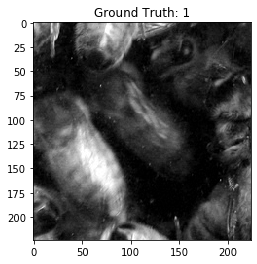

In [24]:
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets[0]))

### 4. Define Architecture

**[4.1]** Import models from torchvision

In [25]:
# Placeholder for student's code (1 line of Python code)
# Task: Import models from torchvision

In [26]:
# Solution
from torchvision import models

**[4.2]** Instantiate a pre-trained `models.resnet50()` and save it into a variable called `model` 

In [27]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a pre-trained models.resnet50() and save it into a variable called model

In [28]:
# Solution:
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


**[4.3]** Print the architecture of this model

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Print the architecture of this model

In [29]:
# Solution:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**[4.4]** Create a for lopp that will iterate through the model's parameters and set them as non-trainable

In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Create a for lopp that will iterate through the model's parameters and set them as non-trainable

In [30]:
# Solution:
for param in model.parameters():
    param.requires_grad = False

**[4.5]** Create a variable called `n_inputs` that will contains the number of neurons of the `fc` layer

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a variable called n_inputs that will contains the number of neurons of the fc layer

In [31]:
# Solution:
n_inputs = model.fc.in_features

**[4.6]** Import torch.nn as nn

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import torch.nn as nn

In [32]:
# Solution:
import torch.nn as nn

**[4.7]** Replace the `fc` layer by:
- fully-connected layer of 256 neurons with relu and dropout of 0.4
- fully-connected layer of 1 neurons with sigmoid

In [ ]:
# Placeholder for student's code (multiple lines of Python code)
# Task: Replace the `fc` layer

In [33]:
# Solution:
model.fc = nn.Sequential(
    nn.Linear(n_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 1),
    nn.Sigmoid()
)

**[4.8]** Import the `get_device` function from src.models.pytorch 

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import the get_device function from src.models.pytorch

In [34]:
# Solution:
from src.models.pytorch import get_device

**[4.9]** Get the device available and set to the model to use it

In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Get the device available and set to the model to use it

In [35]:
# Solution:
device = get_device()
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 5. Train the model

**[5.1]** Import train_binary and test_binary from src.models.pytorch

In [ ]:
# Placeholder for student's code (multiple lines of Python code)
# Task: Import train_binary and test_binary from src.models.pytorch

In [36]:
# Solution:
from src.models.pytorch import train_binary, test_binary

**[5.2]** Instantiate a `nn.BCELoss()` and save it into a variable called `criterion`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a nn.BCELoss() and save it into a variable called criterion

In [37]:
# Solution:
criterion = nn.BCELoss() # Binary Cross Entropy between the target and the output

In [38]:
# nn.BCELoss?

Init signature:
nn.BCELoss(
    weight: Union[torch.Tensor, NoneType] = None,
    size_average=None,
    reduce=None,
    reduction: str = 'mean',
) -> None
Docstring:     
Creates a criterion that measures the Binary Cross Entropy
between the target and the output:

The unreduced (i.e. with :attr:`reduction` set to ``'none'``) loss can be described as:

.. math::
    \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
    l_n = - w_n \left[ y_n \cdot \log x_n + (1 - y_n) \cdot \log (1 - x_n) \right],

where :math:`N` is the batch size. If :attr:`reduction` is not ``'none'``
(default ``'mean'``), then

.. math::
    \ell(x, y) = \begin{cases}
        \operatorname{mean}(L), & \text{if reduction} = \text{`mean';}\\
        \operatorname{sum}(L),  & \text{if reduction} = \text{`sum'.}
    \end{cases}

This is used for measuring the error of a reconstruction in for example
an auto-encoder. Note that the targets :math:`y` should be numbers
between 0 and 1.

Notice that if :math:`x_n` is either 

**[5.3]** Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called optimizer

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called optimizer

In [39]:
# Solution:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**[5.4]** Create 2 variables called `N_EPOCHS` and `BATCH_SIZE` that will respectively take the values 50 and 32

In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Create 2 variables called N_EPOCHS and BATCH_SIZE that will respectively take the values 50 and 32

In [40]:
# Solution:
N_EPOCHS = 5
BATCH_SIZE = 32

**[5.5]** Create a for loop that will iterate through the specified number of epochs and will train the model with the training set and assess the performance on the validation set and print their scores

In [ ]:
# Placeholder for student's code (multiples lines of Python code)
# Task: Create a for loop that will iterate through the specified number of epochs and will train the model with the training set and assess the performance on the validation set and print their scores

In [ ]:
# Solution:
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_binary(train_data, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_binary(test_data, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.4f}%')
    print(f'\t(valid)\t|\tLoss: {valid_loss:.4f}\t|\tAcc: {valid_acc * 100:.4f}%')

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


**[5.6]** Save the model into the `models` folder

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Save the model into the models folder

In [ ]:
# Solution:
torch.save(model, "../models/pytorch_mnist_cnn.pt")

### 6.   Push changes

**[6.1]** Add you changes to git staging area

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Add you changes to git staging area

In [ ]:
# Solution:
git add .

**[6.2]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Create the snapshot of your repository and add a description

In [ ]:
# Solution:
git commit -m "pytorch resnet"

**[6.3]** Push your snapshot to Github

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Push your snapshot to Github

In [ ]:
# Solution:
git push

**[6.4]** Check out to the master branch

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Check out to the master branch

In [ ]:
# Solution:
git checkout master

**[6.5]** Pull the latest updates

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Pull the latest updates

In [ ]:
# Solution:
git pull

**[6.6]** Check out to the `pytorch_mnist` branch

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Merge the branch pytorch_bee_ant

In [ ]:
# Solution:
git checkout pytorch_bee_ant

**[6.7]** Merge the `master` branch and push your changes

In [ ]:
# Placeholder for student's code (2 command lines)
# Task: Merge the master branch and push your changes

In [ ]:
# Solution:
git merge master
git push

**[6.8]** Go to Github and merge the branch after reviewing the code and fixing any conflict

**[6.9]** Stop the Docker container

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Stop the Docker container

In [ ]:
# Solution:
docker stop adv_dsi_lab_6